# LDA

In [1]:
from PIL import Image
import numpy as np
from reduce_dim import PCA, LDA
from utils_for_data import *
from functions import *
import matplotlib.pyplot as plt
import os
import time

## Make Dataset

In [2]:
train = make_trainset()
test = make_testset()

## Generate LDA model

In [3]:
lda = LDA(num=5) # num: dimension

## Training

In [4]:
start = time.time()
lda.fit(train)
print(time.time()-start)

338.6554009914398


## Eval

In [5]:
# gallery, query 나누기
gallery, query = divide(test)
    
# gallery, query transform
gallery_transformed = lda.transform(gallery)
query_transformed = lda.transform(query)
    
# similarity 계산
gallery_transformed_r = gallery_transformed.reshape(28,1,5)
query_transformed_r = query_transformed.reshape(1,12,5)
    
similarity = np.sum(np.square(query_transformed_r-gallery_transformed_r),axis=-1)
similarity = similarity.T
    
# acc 계산
result, acc = compute_result_and_accuracy(similarity)

## Result

In [6]:
result

[array([[7, 0, 0, 0],
        [7, 0, 0, 0],
        [7, 0, 0, 0]]),
 array([[0, 7, 0, 0],
        [0, 7, 0, 0],
        [0, 7, 0, 0]]),
 array([[0, 0, 7, 0],
        [0, 0, 7, 0],
        [0, 0, 7, 0]]),
 array([[0, 0, 0, 7],
        [0, 0, 0, 7],
        [0, 0, 0, 7]])]

## Accuaracy

In [7]:
acc

array([[100.,   0.,   0.,   0.],
       [  0., 100.,   0.,   0.],
       [  0.,   0., 100.,   0.],
       [  0.,   0.,   0., 100.]])

## Draw 3d plot

/home/yura/yura11/functions.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.scatter(gallery_transformed[:, 0].astype(np.float32), gallery_transformed[:,1].astype(np.float32), gallery_transformed[:, 2].astype(np.float32), c='red')
/home/yura/yura11/functions.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.scatter(query_transformed[:, 0].astype(np.float32), query_transformed[:,1].astype(np.float32), query_transformed[:, 2].astype(np.float32), c='blue')


<Figure size 960x960 with 0 Axes>

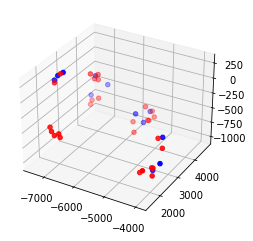

In [8]:
# eigen matrix 찍을 준비
eig_mat = lda.eig_mat[:,0:5]
eig_mat=eig_mat.T
eig_mat_f=eig_mat.reshape(5,112,92)

make_3d_plot(gallery_transformed, query_transformed)

## fisher face

/home/yura/yura11/functions.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
  for image, ax in zip(test.astype(np.float32), axes.ravel()):


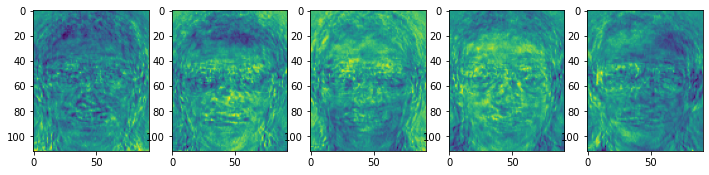

In [9]:
plot_lda(eig_mat_f,1,5)